In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand, diff, lambdify

In [5]:
def hermite_interpolacion_simbolico(x, y, dy):
    """
    Calcula el polinomio de interpolación de Hermite en forma simbólica.

    Parámetros:
    x : array de valores x de la tabla
    y : array de valores y de la tabla
    dy : array de derivadas en los puntos de x

    Retorna:
    polinomio : expresión simbólica del polinomio de Hermite
    """
    n = len(x)
    xi = symbols('x')  # Variable simbólica para el polinomio
    H = 0

    for i in range(n):
        # Base de Hermite H_i(x)
        L_i = 1  # Lagrange base
        for j in range(n):
            if i != j:
                L_i *= (xi - x[j]) / (x[i] - x[j])

        h_0 = (1 - 2 * diff(L_i, xi).subs(xi, x[i]) * (xi - x[i])) * (L_i ** 2)
        h_1 = (xi - x[i]) * (L_i ** 2)

        # Suma los términos del polinomio
        H += y[i] * h_0 + dy[i] * h_1

    return expand(simplify(H))

In [6]:
def hermite_interpolacion_numerica(x, y, dy, x_eval):
    """
    Evalúa el polinomio de interpolación de Hermite en puntos dados.

    Parámetros:
    x : array de valores x de la tabla
    y : array de valores y de la tabla
    dy : array de derivadas en los puntos de x
    x_eval : valores en los que se evalúa el polinomio

    Retorna:
    valores : valores del polinomio en x_eval
    """
    polinomio = hermite_interpolacion_simbolico(x, y, dy)
    xi = symbols('x')
    funcion = lambdify(xi, polinomio, 'numpy')
    return funcion(x_eval)

In [7]:
# Ejemplo de datos
x = np.array([1, 2, 3])  # Valores de x
y = np.array([1, 4, 9])  # Valores de y
dy = np.array([0, 0, 0])  # Derivadas en los puntos

In [8]:
# Generar el polinomio simbólico
polinomio_simbolico = hermite_interpolacion_simbolico(x, y, dy)
print("El polinomio de interpolación de Hermite es:")
print(polinomio_simbolico)

El polinomio de interpolación de Hermite es:
-6*x**5 + 59*x**4 - 222*x**3 + 398*x**2 - 336*x + 108


In [9]:
# Dominio para graficar el polinomio
x_eval = np.linspace(min(x), max(x), 500)
xi = symbols('x')

In [10]:
# Convertir el polinomio simbólico a una función evaluable numéricamente
funcion = lambdify(xi, polinomio_simbolico, 'numpy')
p_eval = funcion(x_eval)

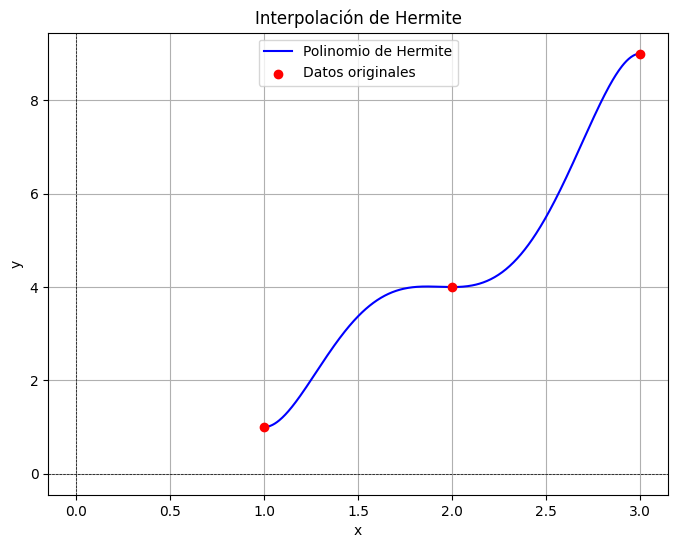

In [11]:
# Gráfica del polinomio y los puntos originales
plt.figure(figsize=(8, 6))
plt.plot(x_eval, p_eval, label="Polinomio de Hermite", color="blue")
plt.scatter(x, y, color="red", label="Datos originales", zorder=5)
plt.title("Interpolación de Hermite")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()